In [12]:
import xarray as xr
import matplotlib.pyplot as plt 

# Data from field campaigns, as downloaded 

2015: CSET campaign (Albrecht et al. BAMS) 

2020: EUREC4A campaign in Atlantic

In [49]:
!ls /Users/bmapes/Box/scwaves/g15.20150717.5km_folder/

g15.2015198.0000.nc g15.2015198.0600.nc g15.2015198.1145.nc g15.2015198.1715.nc
g15.2015198.0030.nc g15.2015198.0630.nc g15.2015198.1200.nc g15.2015198.1730.nc
g15.2015198.0100.nc g15.2015198.0645.nc g15.2015198.1230.nc g15.2015198.1800.nc
g15.2015198.0115.nc g15.2015198.0700.nc g15.2015198.1245.nc g15.2015198.1845.nc
g15.2015198.0130.nc g15.2015198.0715.nc g15.2015198.1300.nc g15.2015198.1900.nc
g15.2015198.0145.nc g15.2015198.0730.nc g15.2015198.1315.nc g15.2015198.1930.nc
g15.2015198.0200.nc g15.2015198.0745.nc g15.2015198.1330.nc g15.2015198.1945.nc
g15.2015198.0215.nc g15.2015198.0815.nc g15.2015198.1345.nc g15.2015198.2000.nc
g15.2015198.0245.nc g15.2015198.0830.nc g15.2015198.1400.nc g15.2015198.2015.nc
g15.2015198.0300.nc g15.2015198.0845.nc g15.2015198.1415.nc g15.2015198.2130.nc
g15.2015198.0330.nc g15.2015198.0900.nc g15.2015198.1430.nc g15.2015198.2145.nc
g15.2015198.0345.nc g15.2015198.0930.nc g15.2015198.1445.nc g15.2015198.2200.nc
g15.2015198.0400.nc g15.2015198.0945.nc 

In [24]:
ds2015 = xr.open_dataset('/Users/bmapes/Box/scwaves/g15.20150717.5km_folder/g15.2015198.2000.nc')
ds2015 

<xarray.Dataset>
Dimensions:     (time: 1, latitude: 1024, longitude: 1024)
Coordinates:
  * latitude    (latitude) float32 59.74 59.71 59.67 59.64 ... 9.973 9.91 9.848
  * longitude   (longitude) float32 -172.5 -172.5 -172.4 ... -107.5 -107.5
  * time        (time) timedelta64[ns] 16633 days 20:00:00
Data variables:
    gvar_ch1    (time, latitude, longitude) float32 ...
    gvar_ch2    (time, latitude, longitude) float32 ...
    gvar_ch3    (time, latitude, longitude) float32 ...
    gvar_ch4    (time, latitude, longitude) float32 ...
    gvar_ch6    (time, latitude, longitude) float32 ...
    sun_zenith  (latitude, longitude) float32 ...
Attributes: (12/70)
    projection:             6
    et_affine:              [-1.81818182e-01  0.00000000e+00  0.00000000e+00 ...
    projection_name:        mercator
    satellite:              goes-15
    sensor:                 12
    sensor_name:            gvissr
    ...                     ...
    longitude\coord:        x
    longitude\scale:        1.0
    longitude\offset:       0.0
    time\coord:             u
    time\scale:             1.0
    time\offset:            0.0

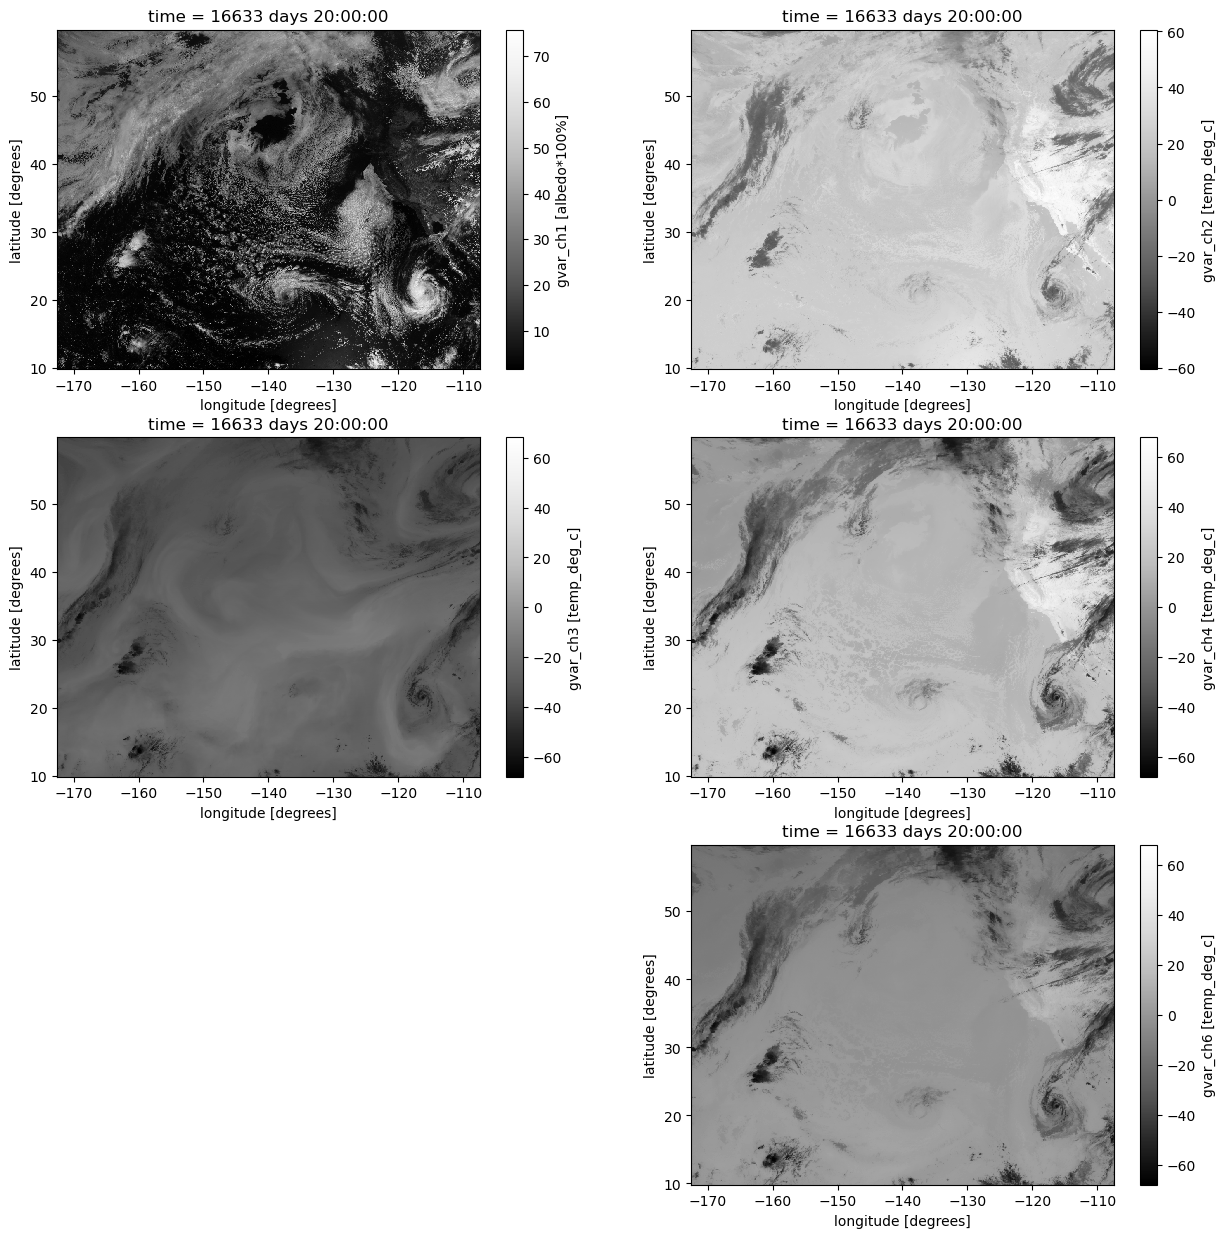

In [25]:
# Nice and clean, lat-long grid and 1024x1024 

plt.figure( figsize=[15,15] )

for i in [1,2,3,4,6]:
    plt.subplot(3,2,i)
    plotstr = 'ds2015.gvar_ch'+str(i)+".plot(cmap='Greys_r')"
    exec(plotstr)

# EUREC4A: on scanline coordinate, with lat-lon as data fields 

In [44]:
!ls /Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020*/*nc

/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200220000166_BARBADOS-2KM-FD.level2.nc
/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200220010166_BARBADOS-2KM-FD.level2.nc
/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200220020166_BARBADOS-2KM-FD.level2.nc
/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200220030166_BARBADOS-2KM-FD.level2.nc
/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200220040166_BARBADOS-2KM-FD.level2.nc
/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200220050166_BARBADOS-2KM-FD.level2.nc
/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200220100166_BARBADOS-2KM-FD.level2.nc
/Users/bmapes/Box/EUREC4A_S

In [45]:
file='/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200221920165_BARBADOS-2KM-FD.level2.nc'

In [46]:
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:                            (scan_lines_along_track_direction: 531,
                                        pixel_elements_along_scan_direction: 658,
                                        the_third_dimension: 500)
Coordinates:
    latitude                           (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    longitude                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
Dimensions without coordinates: scan_lines_along_track_direction,
                                pixel_elements_along_scan_direction,
                                the_third_dimension
Data variables: (12/93)
    scan_line_number                   (scan_lines_along_track_direction) float64 ...
    scan_line_time                     (scan_lines_along_track_direction) timedelta64[ns] ...
    bad_pixel_mask                     (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    latitude_pc                        (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    longitude_pc                       (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    sensor_zenith_angle                (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    ...                                 ...
    cld_reff_dcomp_2                   (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_reff_dcomp_3                   (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_cwp_dcomp                      (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    iwc_dcomp                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    lwc_dcomp                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_geo_thick                      (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
Attributes: (12/87)
    HDF_LIB_VERSION:                      unknown
    MACHINE:                              solar3.ssec.wisc.edu
    PROGLANG:                             F90
    date_created:                         2020-01-22T19:30:36+00:00
    product_version:                      v05r04
    summary:                               To add
    ...                                   ...
    NUMBER_OF_SCANS_LEVEL1B:              531
    NUMBER_OF_SCANS_LEVEL2:               531
    PROCESSING_TIME_MINUTES:              0.50525665
    NONCONFIDENT_CLOUD_MASK_FRACTION:     0.07414467
    ACHA_SUCCESS_FRACTION:                0.99948126
    DCOMP_SUCCESS_FRACTION:               0.9897981

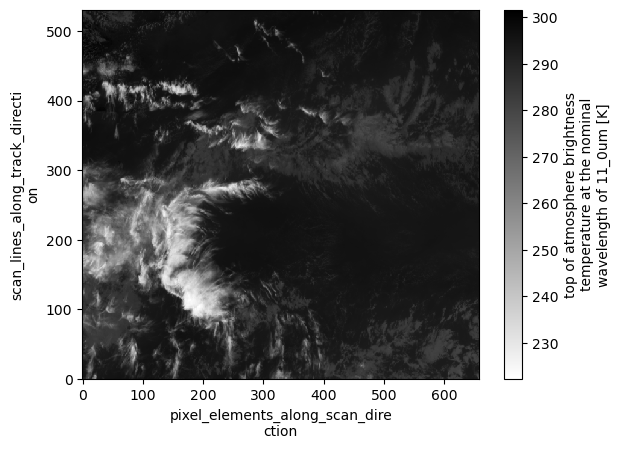

In [48]:
ds.temp_11_0um_nom.plot(cmap='gray_r')  # infrared 11micron window 

In [28]:
ds.data_vars

Data variables:
    scan_line_number                   (scan_lines_along_track_direction) float64 ...
    scan_line_time                     (scan_lines_along_track_direction) timedelta64[ns] ...
    bad_pixel_mask                     (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    latitude_pc                        (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    longitude_pc                       (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    sensor_zenith_angle                (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    solar_zenith_angle                 (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    relative_azimuth_angle             (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    solar_azimuth_angle                (scan_lines_along_track_dir